In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [4]:
import pandas as pd

# Читаем и очищаем файл
cleaned_data = []
with open('diamonds.csv', 'r') as f:
    for line in f:
        cleaned_line = line.strip().strip('"')
        if cleaned_line:  # Пропускаем пустые строки
            cleaned_data.append(cleaned_line)

# Сохраняем очищенный файл
with open('diamonds_clean.csv', 'w') as f:
    f.write('\n'.join(cleaned_data))

# Читаем очищенный файл
diamonds_df = pd.read_csv('diamonds_clean.csv')
print(diamonds_df.head())

   Unnamed: 0  carat""      cut"" color"" clarity""  depth""  table""  \
0           1     0.23    Ideal""     E""     SI2""     61.5     55.0   
1           2     0.21  Premium""     E""     SI1""     59.8     61.0   
2           3     0.23     Good""     E""     VS1""     56.9     65.0   
3           4     0.29  Premium""     I""     VS2""     62.4     58.0   
4           5     0.31     Good""     J""     SI2""     63.3     58.0   

   price""   x""   y""     z  
0      326  3.95  3.98  2.43  
1      326  3.89  3.84  2.31  
2      327  4.05  4.07  2.31  
3      334  4.20  4.23  2.63  
4      335  4.34  4.35  2.75  


In [5]:

diamonds_df = pd.read_csv('diamonds_clean.csv')
diamonds_df.head()

diamonds_df.columns = diamonds_df.columns.str.strip('"')

# Убираем кавычки из строковых значений во всех столбцах
for col in diamonds_df.columns:
    if diamonds_df[col].dtype == 'object':  # Только для строковых колонок
        diamonds_df[col] = diamonds_df[col].str.strip('"')
        
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [7]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [8]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [9]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.2)

Обучение модели

In [12]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_pred, y_test)


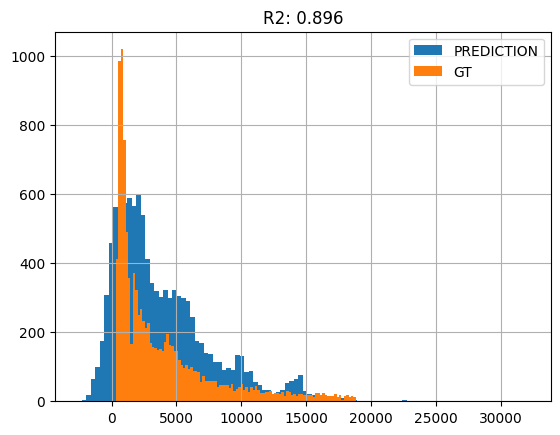

In [13]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [29]:
import numpy as np


class CustomLinearRegression:
    def __init__(
        self,
        *,
        penalty="l2",  # тип регуляризации
        alpha=0.01,  # коэф регуляризации
        max_iter=1000,  # максимальное количество эпох
        tol=0.01,  # порог сходимости
        random_state=None,
        eta0=0.2,  # начальная скорость обучения
        early_stopping=True,  # ранняя остановка для предотвращения переобучения
        validation_fraction=0.2,  # доля данных для валидации
        n_iter_no_change=8,  # эпохи без улучшения функции потерь
        shuffle=False,  # перемешивание данных перед каждой эпохой
    ):
        self.penalty = penalty
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.eta0 = eta0
        self.early_stopping = early_stopping
        self.validation_fraction = validation_fraction
        self.n_iter_no_change = n_iter_no_change
        self.shuffle = shuffle
        self._coef = None
        self._intercept = None

    def get_params(self, deep=True):
        """Возвращает параметры модели"""
        return {
            'penalty': self.penalty,
            'alpha': self.alpha,
            'max_iter': self.max_iter,
            'tol': self.tol,
            'random_state': self.random_state,
            'eta0': self.eta0,
            'early_stopping': self.early_stopping,
            'validation_fraction': self.validation_fraction,
            'n_iter_no_change': self.n_iter_no_change,
            'shuffle': self.shuffle
        }

    def _prepare_data(self, x, y):
        """Подготовка и валидация входных данных"""
        x_np = np.array(x)
        if x_np.ndim == 1:
            x_np = x_np.reshape(-1, 1) 

        y_np = np.array(y)
        if y_np.ndim == 1:
            y_np = y_np.reshape(-1, 1)

        if x_np.shape[0] != y_np.shape[0]:
            raise ValueError("Количество образцов в X и y должно совпадать")
            
        return x_np, y_np

    def _initialize_weights(self, n_features):
        """Инициализация весов модели"""
        if self.random_state is not None:
            np.random.seed(self.random_state)

        self._coef = np.random.randn(1, n_features) * 0.01  
        self._intercept = np.random.randn(1) * 0.01

    def _split_validation_data(self, x, y):
        """Разделение данных на тренировочные и валидационные"""
        if self.early_stopping:  
            validation_size = int(self.validation_fraction * len(x))  
            x_train, x_val = x[:-validation_size], x[-validation_size:]
            y_train, y_val = y[:-validation_size], y[-validation_size:]
            return x_train, y_train, x_val, y_val
        else:
            return x, y, None, None

    def _shuffle_data(self, x, y):
        """Перемешивание данных если включено"""
        if self.shuffle:  
            indices = np.random.permutation(len(x))
            return x[indices], y[indices]
        return x, y

    def _compute_gradients(self, x_batch, y_batch, y_pred):
        """Вычисление градиентов для пакета данных"""
        grad_coef = -2 * np.dot(x_batch.T, (y_batch - y_pred)) / len(x_batch)
        grad_intercept = -2 * np.sum(y_batch - y_pred) / len(x_batch)
        grad_coef += self.get_penalty_grad().T
        
        return grad_coef, grad_intercept

    def _update_weights(self, grad_coef, grad_intercept):
        """Обновление весов модели"""
        self._coef -= self.eta0 * grad_coef.T
        self._intercept -= self.eta0 * grad_intercept

    def _compute_loss(self, x, y):
        """Вычисление функции потерь"""
        y_pred = self.predict(x)
        return np.mean((y - y_pred) ** 2)

    def _check_early_stopping(self, current_loss, best_loss, no_improvement_count, is_validation=True):
        """Проверка условий для ранней остановки"""
        if current_loss < best_loss - self.tol:
            return current_loss, 0, False  # Улучшение, сбрасываем счетчик
        else:
            no_improvement_count += 1
            if no_improvement_count >= self.n_iter_no_change:
                print(f"Ранняя остановка на итерации: достигнут предел без улучшения")
                return best_loss, no_improvement_count, True  # Останавливаем
            return best_loss, no_improvement_count, False  # Продолжаем

    def get_penalty_grad(self):  
        """Вычисление градиента регуляризации"""
        if self.penalty == "l2":  
            return 2 * self.alpha * self._coef
        elif self.penalty == "l1":  
            return self.alpha * np.sign(self._coef)
        else:
            return 0  

    def fit(self, x, y):  
        """Обучение модели"""
        # Подготовка данных
        x_np, y_np = self._prepare_data(x, y)
        
        # Инициализация весов
        self._initialize_weights(x_np.shape[1])
        
        # Разделение на тренировочные и валидационные данные
        x_train, y_train, x_val, y_val = self._split_validation_data(x_np, y_np)

        best_loss = float('inf')
        no_improvement_count = 0

        # Основной цикл обучения
        for iter in range(self.max_iter):
            # Перемешивание данных
            x_shuffled, y_shuffled = self._shuffle_data(x_train, y_train)

            # Прямой проход и вычисление градиентов
            y_pred = self.predict(x_shuffled)
            grad_coef, grad_intercept = self._compute_gradients(x_shuffled, y_shuffled, y_pred)
            
            # Обновление весов
            self._update_weights(grad_coef, grad_intercept)

            # Вычисление потерь
            current_loss = self._compute_loss(x_train, y_train)

            # Проверка ранней остановки
            if self.early_stopping:
                val_loss = self._compute_loss(x_val, y_val)
                best_loss, no_improvement_count, should_stop = self._check_early_stopping(
                    val_loss, best_loss, no_improvement_count, True
                )
            else:
                best_loss, no_improvement_count, should_stop = self._check_early_stopping(
                    current_loss, best_loss, no_improvement_count, False
                )

            # Логирование
            if iter % 100 == 0:
                loss_type = "Val" if self.early_stopping else "Train"
                loss_value = val_loss if self.early_stopping else current_loss
                print(f"Iteration {iter}, {loss_type} Loss: {loss_value:.6f}")

            # Проверка на остановку
            if should_stop:
                break

    def predict(self, x):
        """Предсказание модели"""
        x_np = np.array(x)
        if x_np.ndim == 1:
            x_np = x_np.reshape(-1, 1)
        return np.dot(x_np, self._coef.T) + self._intercept

    @property
    def coef_(self):
        return self._coef

    @property
    def intercept_(self):
        return self._intercept

    @coef_.setter
    def coef_(self, value):
        self._coef = value

    @intercept_.setter
    def intercept_(self, value):
        self._intercept = value

In [30]:
reg = CustomLinearRegression(
    penalty="l1",  # тип регуляризации
    alpha=0.1,  # коэф регуляризации
    max_iter=1000,  # максимальное количество эпох
    tol=0.1,  # порог сходимости
    random_state=None,
    eta0=0.15,  # начальная скорость обучения
    early_stopping=True,  # ранняя остановка для предотвращения переобучения
    validation_fraction=0.2,  # доля данных для валидации
    n_iter_no_change=12,  # эпохи без улучшения функции потерь
    shuffle=False,  # перемешивание данных перед каждой эпохой

)
    
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_pred, y_test)

Iteration 0, Val Loss: 16552119.902328
Iteration 100, Val Loss: 7308495.660655
Iteration 200, Val Loss: 4523950.468580
Iteration 300, Val Loss: 3213462.551822
Iteration 400, Val Loss: 2578707.775189
Iteration 500, Val Loss: 2265789.712403
Iteration 600, Val Loss: 2107593.681009
Iteration 700, Val Loss: 2024439.103882
Iteration 800, Val Loss: 1978113.103524
Iteration 900, Val Loss: 1950169.495622


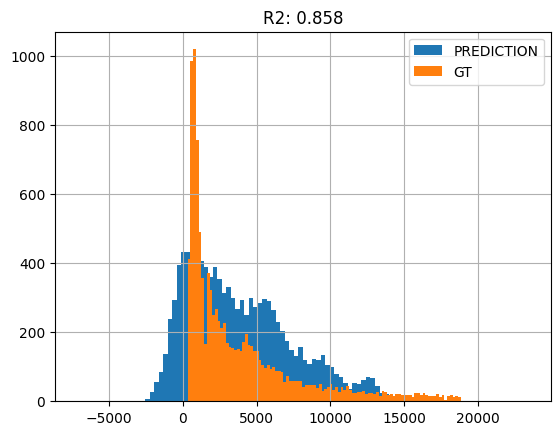

In [31]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

MLP для задачи регрессии

In [17]:
class MLPRegressor:
    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.001, max_iter=10):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = []    
        self.biases = []     

    def _init_weights(self, size):
        self.weights = []
        self.biases = []
        # Входной + скрытый + выходной [10, 5, 3, 1]
        layer_size = [size] + list(self.hidden_layer_sizes) + [1]
        
        for i in range(len(layer_size) - 1):
            # Норм распределение
            w = np.random.normal(0, 0.1, (layer_size[i], layer_size[i + 1])) 
            # Стандартизация
            std = np.sqrt(2 / (layer_size[i] + layer_size[i + 1]))
            w = w * std
            # Нули
            b = np.zeros((1, layer_size[i + 1]))
            
            self.weights.append(w)
            self.biases.append(b)

    def _update_weights(self, gradients):
        gradients_w, gradients_b = gradients
        
        for i in range(len(self.weights)):
            
            self.weights[i] = self.weights[i] - self.learning_rate * gradients_w[i]
            self.biases[i] = self.biases[i] - self.learning_rate * gradients_b[i]

    def _forward(self, x):
        self.activations = [x]
        
        for i in range(len(self.weights) - 1):
            z = np.matmul(self.activations[-1], self.weights[i]) + self.biases[i]
            
            sigm_value = self._sigmoid(z)
            self.activations.append(sigm_value)
            
        z_output = np.matmul(self.activations[-1], self.weights[-1]) + self.biases[-1]
        self.activations.append(z_output)  # Выходной слой без активации
        
        return z_output

    def _back(self, x, y_true, y_pred):
        grads_w = []
        grads_b = []

        error = y_pred - y_true  
        n_samples = x.shape[0]

        for i in range(len(self.weights)-1, -1, -1):
            if i == len(self.weights) - 1: 
                grad_z = error  
            else:
                grad_z = grad_a * self._sigmoid_proizv(self.activations[i + 1])
                
            grad_w = np.matmul(self.activations[i].T, grad_z / n_samples)
            grad_b = np.sum(grad_z, axis=0, keepdims=True) / n_samples
            
            grads_w.append(grad_w)
            grads_b.append(grad_b)
            
            if i > 0:
                grad_a = np.matmul(grad_z, self.weights[i].T)
        
        # Разворачиваем градиенты
        return grads_w[::-1], grads_b[::-1]

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_proizv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def _mse(self, y_true, y_pred):
        error = y_true - y_pred
        return np.mean(error**2)

    
    
    def fit(self, X, y):
        
        self._init_weights(X.shape[1])
        
        for epoch in range(self.max_iter):
            # Прямой проход
            y_pred = self._forward(X)
            # Текущая ошибка
            loss = self._mse(y, y_pred)
            # Обратный проход
            gradients = self._back(X, y, y_pred)
            # Обновление весов
            self._update_weights(gradients)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
    
    def predict(self, X):
        current_activation = X
        
        for i in range(len(self.weights) - 1):
            z = np.matmul(current_activation , self.weights[i]) + self.biases[i]
            current_activation = self._sigmoid(z)
        
        z_output = np.matmul(current_activation, self.weights[-1]) + self.biases[-1]
        
        return z_output

In [27]:
# 1. Масштабирование и X и y
from sklearn.preprocessing import StandardScaler

# Создаем scaler'ы
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Масштабируем ТРЕНИРОВОЧНЫЕ данные
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Масштабируем ТЕСТОВЫЕ данные используя параметры от ТРЕНИРОВОЧНЫХ
X_test_scaled = scaler_X.transform(X_test)  # ← ТОЛЬКО transform()!
# y_test НЕ масштабируем, он нам нужен в исходном виде для оценки

# 2. Обучение на scaled данных
model = MLPRegressor(
    hidden_layer_sizes=(50,),
    learning_rate=0.001, 
    max_iter=300
)
model.fit(X_train_scaled, y_train_scaled)

# 3. Предсказание и обратное преобразование
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 4. Оценка в исходном масштабе
score = r2_score(y_test, y_pred)  # сравниваем с исходными y_test
print(score)

Epoch 0, Loss: 0.999889
Epoch 100, Loss: 0.998197
Epoch 200, Loss: 0.996770
0.004665247150542062


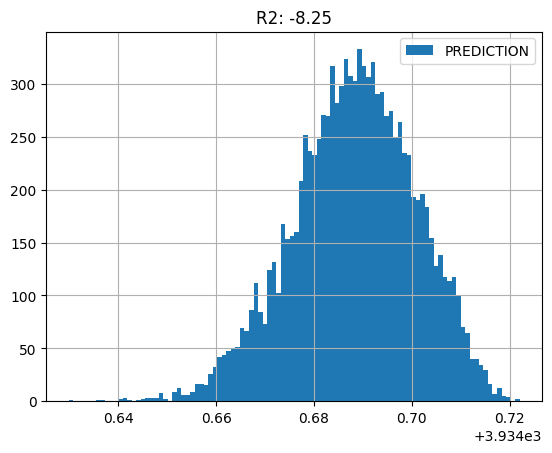

In [24]:

plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
#plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();